In [1]:
'''
This shows how to created perform data augmentation using keras.
This allows you to quickly expand your dataset and prevents data bias
As a result, it can greatly improves the resilliences of the conv net
'''

'\nThis shows how to created perform data augmentation using keras.\nThis allows you to quickly expand your dataset and prevents data bias\nAs a result, it can greatly improves the resilliences of the conv net\n'

In [18]:
import os
import numpy as np
import cv2
import keras

In [19]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

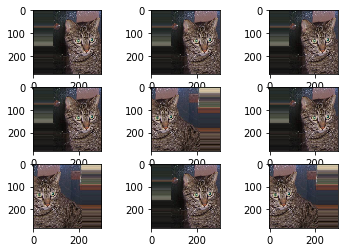

In [49]:
#HORIZONTAL SHIFTING

#load image
img = load_img('Dataset/PetImages/Cat/1.jpg')

#convert image to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

#create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-85,85])

#prepare iterator
it = datagen.flow(samples, batch_size=1)

#generate samples and plot
for i in range(9):
    pyplot.subplot(330+1+i)
    
    #generate batch of images
    batch = it.next()
    
    #convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    
    #plot raw pixel data
    pyplot.imshow(image)
    
pyplot.show()

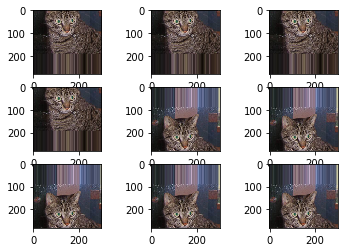

In [19]:
#VERTICAL SHIFTING

img = load_img('Dataset/PetImages/Cat/1.jpg')
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(height_shift_range=[-85,85])
it = datagen.flow(samples, batch_size=1)

for i in range(9):
    pyplot.subplot(330+1+i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
    
pyplot.show()

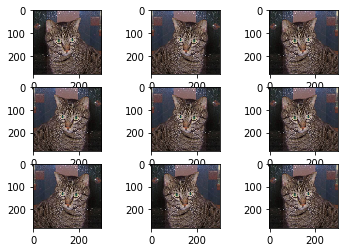

In [21]:
#HORIZONTAL FLIPPING

img = load_img('Dataset/PetImages/Cat/1.jpg')
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)

for i in range(9):
    pyplot.subplot(330+1+i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
    
pyplot.show()

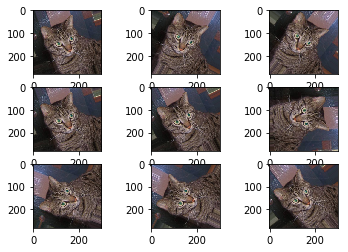

In [23]:
#RANDOMG ROTATION

img = load_img('Dataset/PetImages/Cat/1.jpg')
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(rotation_range=90)
it = datagen.flow(samples, batch_size=1)

for i in range(9):
    pyplot.subplot(330+1+i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
    
pyplot.show()

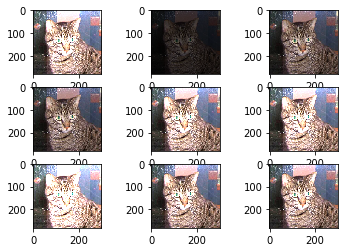

In [36]:
#EXPOSURE

img = load_img('Dataset/PetImages/Cat/1.jpg')
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(brightness_range=[0.2,3])
it = datagen.flow(samples, batch_size=1)

for i in range(9):
    pyplot.subplot(330+1+i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
    
pyplot.show()

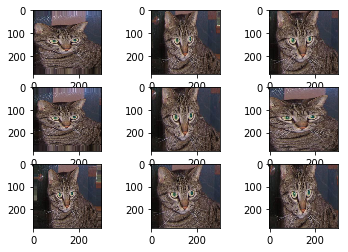

In [44]:
#ZOOMING

img = load_img('Dataset/PetImages/Cat/1.jpg')
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(zoom_range=[0.5,1.2])
it = datagen.flow(samples, batch_size=1)

for i in range(9):
    pyplot.subplot(330+1+i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
    
pyplot.show()

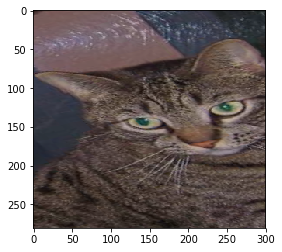

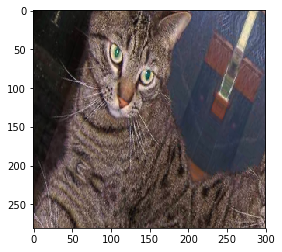

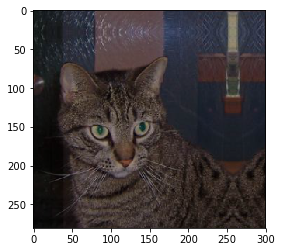

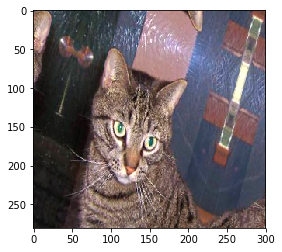

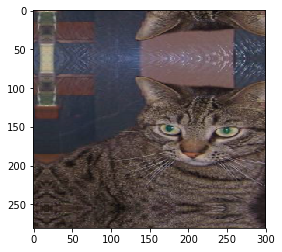

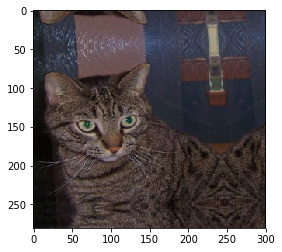

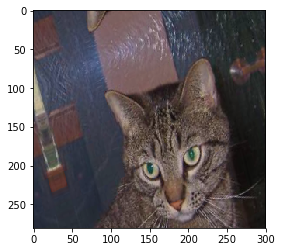

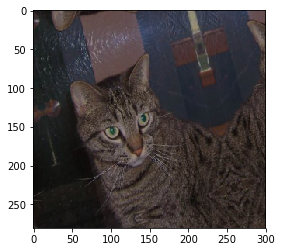

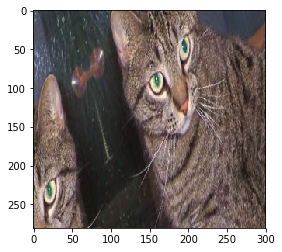

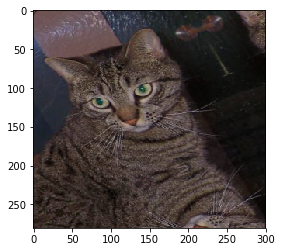

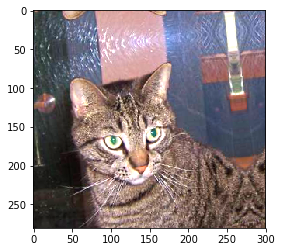

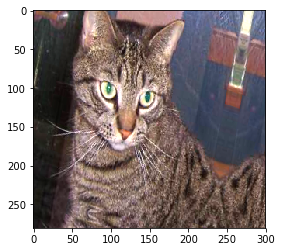

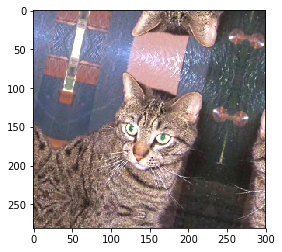

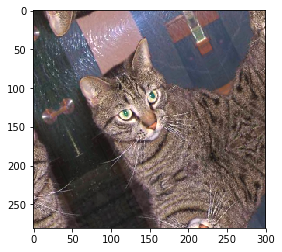

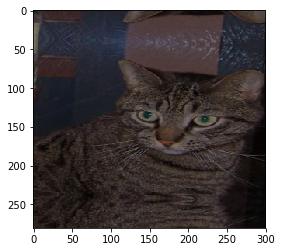

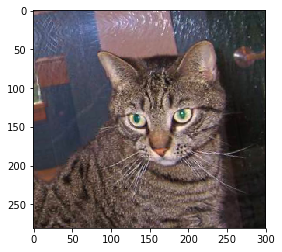

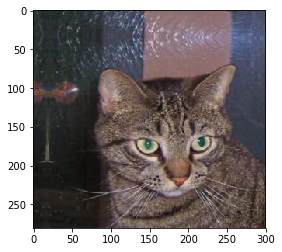

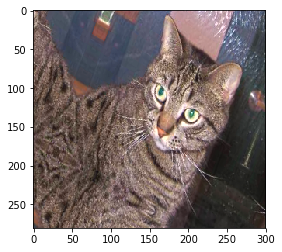

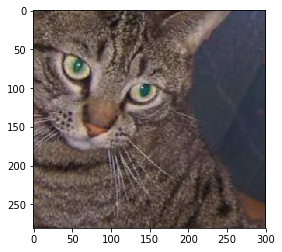

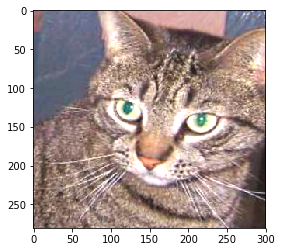

In [6]:
###########################
# PUTTING IT ALL TOGETHER #
###########################

#load image
img = load_img('Dataset/PetImages/Cat/1.jpg')

#convert image to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

#create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.01,
                               zoom_range=[0.5, 1.5],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last',
                               brightness_range=[0.5, 1.5],
                               channel_shift_range=9)

#prepare iterator
it = datagen.flow(samples, batch_size=1)

#generate samples and plot
for i in range(20):
    
    #generate batch of images
    batch = it.next()
    
    #convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    
    #plot raw pixel data
    pyplot.imshow(image)
    pyplot.show()
    
    

In [20]:
#CREATING DATASET

training_data = []
DIR = "Dataset/PetImages"
CATEGORIES = ["Dog", "Cat"]


def create_augmented_images(image_arr, class_num): 

    # expand dimension to one sample
    samples = expand_dims(image_arr, 0)

    #create image data augmentation generator
    datagen = ImageDataGenerator(rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.01,
                                   zoom_range=[0.5, 1.5],
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode='reflect',
                                   data_format='channels_last',
                                   brightness_range=[0.5, 1.5],
                                   channel_shift_range=9)

    #prepare iterator
    it = datagen.flow(samples, batch_size=1)

    #generate samples and plot
    for i in range(20):

        #generate batch of images
        batch = it.next()

        #convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        
        training_data.append([image, class_num])

        #plot raw pixel data




In [121]:
create_training_data()

In [122]:
print(len(training_data))

0


In [21]:
training_data = []
DIR = "Dataset/PetImages"
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DIR, category) # path to cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (50, 50))
                training_data.append([new_array, class_num])
                create_augmented_images(new_array, class_num)
            except Exception as e:
                pass
            
create_training_data()

In [9]:
print(len(training_data))

523866


In [10]:
import random
random.shuffle(training_data)

In [11]:
for sample in training_data[:1]:
    print(sample[0])
    print(sample[1])
    break

[[[183 183 183]
  [183 183 183]
  [183 183 183]
  ...
  [183 183 183]
  [183 183 183]
  [183 183 183]]

 [[183 183 183]
  [183 183 183]
  [183 183 183]
  ...
  [183 183 183]
  [183 183 183]
  [183 183 183]]

 [[183 183 183]
  [183 183 183]
  [183 183 183]
  ...
  [183 183 183]
  [183 183 183]
  [183 183 183]]

 ...

 [[183 183 183]
  [183 183 183]
  [183 183 183]
  ...
  [ 56  47  47]
  [ 56  46  48]
  [ 73  61  69]]

 [[183 183 183]
  [183 183 183]
  [183 183 183]
  ...
  [ 47  40  42]
  [ 50  40  44]
  [ 77  63  75]]

 [[114 152 116]
  [ 88 137  90]
  [ 81 134  82]
  ...
  [ 43  36  38]
  [ 45  35  43]
  [ 68  53  69]]]
0


In [16]:
X = []
y = []

In [17]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, 50, 50, 3)
print(X.shape)
print(y.shape)


(523866, 50, 50, 3)


AttributeError: 'list' object has no attribute 'shape'

In [14]:
#SAVING DATA
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dumps(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dumps(y, pickle_out)
pickle_out.close()

OSError: [Errno 22] Invalid argument